# Download the dataset and unzip it

In [4]:
import os
import pathlib
import glob
import shutil
from zipfile import ZipFile
import gdown

dataset_url = 'https://drive.google.com/uc?export=download&id=1D-PAj48ywRjUZnS93W_rsP9wUJRQ4Ud0'
dataset_name = 'covid_dataset'

if not os.path.isdir(dataset_name):
    gdown.download(dataset_url, output=dataset_name + '.zip', quiet=False)
    zip1 = ZipFile(dataset_name + '.zip')
    zip1.extractall(dataset_name)
    zip1.close()

print("Finished downloading dataset.")



Downloading...
From: https://drive.google.com/uc?export=download&id=1D-PAj48ywRjUZnS93W_rsP9wUJRQ4Ud0
To: /content/covid_dataset.zip
100%|██████████| 45.2k/45.2k [00:00<00:00, 20.8MB/s]

Finished downloading dataset.


## Import Library

In [5]:
import pandas as pd  
import numpy as np    

import matplotlib.pyplot as plt  
import seaborn as seabornInstance
 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


## Visualization

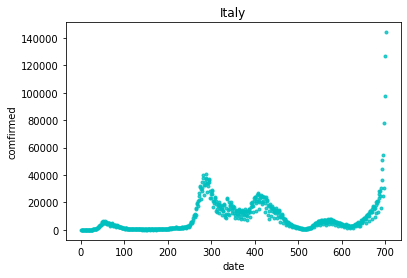

<Figure size 720x360 with 0 Axes>

In [6]:
dataset = pd.read_excel('/content/covid_dataset/covid.xlsx')

#資料轉換
X = dataset['Ndate'].values.reshape(-1,1)
Y = dataset['comfirmed'].values.reshape(-1,1)

plt.plot(X,Y,'o',markersize=3,alpha=0.8,color='c')
plt.title('Italy')  
plt.xlabel('date')  
plt.ylabel('comfirmed')  
plt.show()
plt.figure(figsize=(10,5))
plt.tight_layout()
# seabornInstance.distplot(dataset['comfirmed'])


In [7]:
# Training set
# input
X_train = X[300:670,:]
# output
y_train = Y[300:670,:]

# Testing set
X_test = X[670:701,:]
y_test = Y[670:701,:]

## High order polynomial equation

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 11 次多項式去fit
poly = PolynomialFeatures(degree=11, include_bias=True)

#要查一下
poly_features = poly.fit_transform(X_train)

#後面都一樣
model = LinearRegression()

model.fit(poly_features, y_train)

LinearRegression()

## 畫出所有資料的預測圖


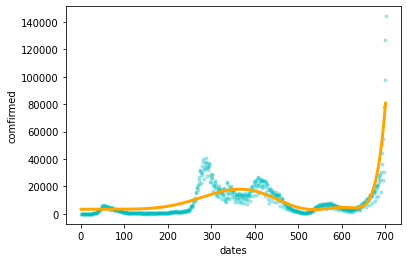

In [9]:
# Plot all data
poly_test_train_feature = poly.fit_transform(X)
y_predicted = model.predict(poly_test_train_feature)

plt.plot(X,Y,'o',markersize=3,alpha=0.3,color='c')
plt.plot(X,y_predicted,linewidth=3,color='orange')
plt.xlabel('dates',fontsize=10)
plt.ylabel('comfirmed',fontsize=10)
plt.savefig('scikit_learn')

# 畫出預測資料 bar chart

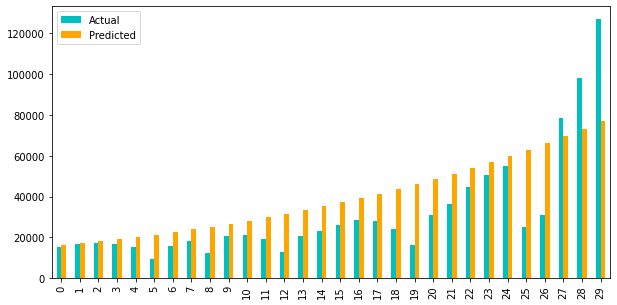

In [10]:
#預測
poly_features_test = poly.fit_transform(X_test)
y_pred = model.predict(poly_features_test)

df = pd.DataFrame({'Actual': Y[670:701].flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(30)

#預測可視化:實際與預測差距
df1.plot(kind='bar',figsize=(10,5),color=['c','orange'])


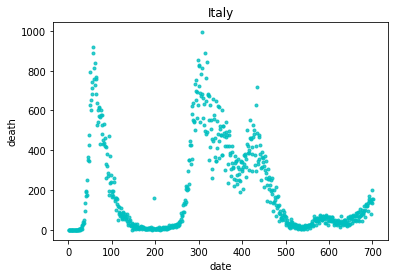

<Figure size 720x360 with 0 Axes>

In [11]:
dataset = pd.read_excel('/content/covid_dataset/covid.xlsx')

#資料轉換
X = dataset['Ndate'].values.reshape(-1,1)
Y = dataset['death'].values.reshape(-1,1)

plt.plot(X,Y,'o',markersize=3,alpha=0.8,color='c')
plt.title('Italy')  
plt.xlabel('date')  
plt.ylabel('death')  
plt.show()
plt.figure(figsize=(10,5))
plt.tight_layout()
# seabornInstance.distplot(dataset['comfirmed'])

In [12]:
# Training set
# input
X_train = X[300:600,:]
# output
y_train = Y[300:600,:]

# Testing set
X_test = X[600:701,:]
y_test = Y[600:701,:]

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_train)
model = LinearRegression()

model.fit(poly_features, y_train)

LinearRegression()

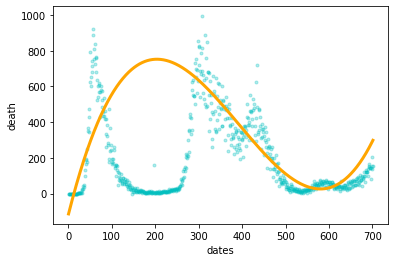

In [14]:
# Plot all data
poly_test_train_feature = poly.fit_transform(X)
y_predicted = model.predict(poly_test_train_feature)

plt.plot(X,Y,'o',markersize=3,alpha=0.3,color='c')
plt.plot(X,y_predicted,linewidth=3,color='orange')
plt.xlabel('dates',fontsize=10)
plt.ylabel('death',fontsize=10)
plt.savefig('scikit_learn')

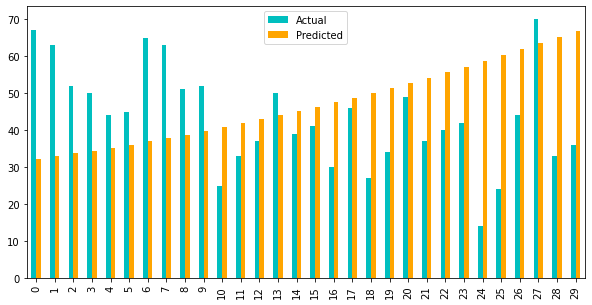

In [15]:
#預測
poly_features_test = poly.fit_transform(X_test)
y_pred = model.predict(poly_features_test)

df = pd.DataFrame({'Actual': Y[600:701].flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(30)

#預測可視化:實際與預測差距
df1.plot(kind='bar',figsize=(10,5),color=['c','orange'])